In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
white = pd.read_csv('data/winequality-white.csv', sep=';')
red = pd.read_csv('data/winequality-red.csv')

In [7]:
(white.shape, red.shape)

((4898, 12), (1599, 12))

Text(0, 0.5, 'quality score')

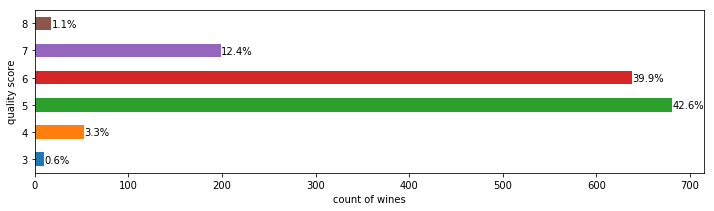

In [21]:
ax = red.quality.value_counts().sort_index().plot.barh(figsize=(12,3))

for bar in ax.patches:
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height()/4,
        f'{bar.get_width()/red.shape[0]:.1%}'
    )
    

plt.xlabel('count of wines')
plt.ylabel('quality score')

In [22]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [24]:
wine = pd.concat(
    [white.assign(kind='white'), red.assign(kind='red')]
)

In [27]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]

In [31]:
len(chemical_properties)

11

In [32]:
x = math.ceil(len(chemical_properties)/4)
x

3

In [33]:
melted = wine.drop(columns='quality').melt(id_vars='kind')

In [35]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [34]:
melted

,kind,variable,value
0,white,fixed acidity,7.0
1,white,fixed acidity,6.3
2,white,fixed acidity,8.1
3,white,fixed acidity,7.2
4,white,fixed acidity,7.2
5,white,fixed acidity,8.1
6,white,fixed acidity,6.2
7,white,fixed acidity,7.0
8,white,fixed acidity,6.3
9,white,fixed acidity,8.1


In [39]:
melted[melted.variable.isin(['alcohol'])].head()  # using mask for choosing right items

,kind,variable,value
64970,white,alcohol,8.8
64971,white,alcohol,9.5
64972,white,alcohol,10.1
64973,white,alcohol,9.9
64974,white,alcohol,9.9


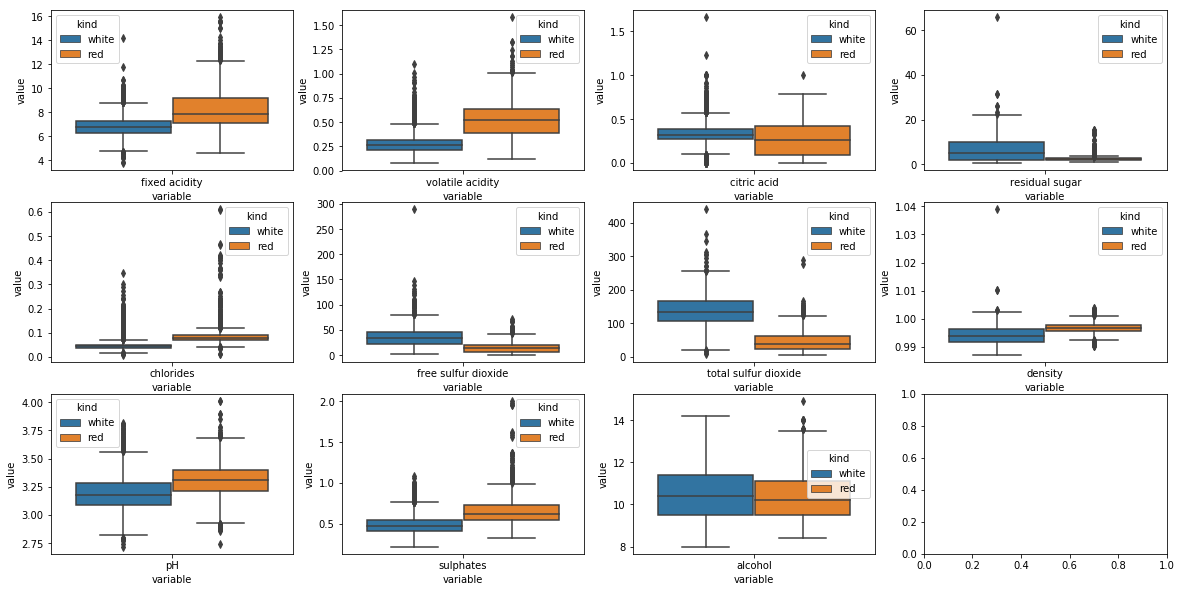

In [47]:
fig, axes = plt.subplots(
    x, 4, figsize=(20,10)
)

axes = axes.flatten()[:-1:]

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])],
        x = 'variable',
        y = 'value',
        hue = 'kind',
        ax=ax
    )